In [1]:
import pandas as pd

In [23]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(r'C:\Users\sagar\Desktop\Data Crunching & Analysis\users.dat', sep='::',
header=None, names=unames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(r'C:\Users\sagar\Desktop\Data Crunching & Analysis\ratings.dat', sep='::',
header=None, names=rnames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(r'C:\Users\sagar\Desktop\Data Crunching & Analysis\movies.dat', sep='::',
header=None, names=mnames)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [27]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [39]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [29]:
data = pd.merge(pd.merge(ratings, users), movies)

In [31]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [32]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [33]:
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [38]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#here the contingency table is made and kept in a data frame data_crosstab
data_crosstab = pd.crosstab(data['gender'],
                            data['rating'],
                               margins = False)
table = data_crosstab.values.tolist()
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent')
else:
    print('Independent')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent')
else:
    print('Independent')

[[13347, 24548, 62966, 87033, 58546], [42827, 83009, 198231, 261938, 167764]]
dof=4
[[ 13840.62786878  26500.80841104  64355.9382889   85982.44290943
   55760.18252185]
 [ 42333.37213122  81056.19158896 196841.0617111  262988.55709057
  170549.81747815]]
probability=0.950, critical=9.488, stat=455.861
Dependent
significance=0.050, p=0.000
Dependent


In [45]:
count_rating_by_title = data.groupby('title').size()
top_250_by_counting = count_rating_by_title.index[count_rating_by_title>=250]

In [47]:
top_250_count_from_mean_rating = mean_ratings.loc[top_250_by_counting]

In [48]:
top_female_ratings = top_250_count_from_mean_rating.sort_values(by='F', ascending=False)

In [50]:
top_male_ratings = top_250_count_from_mean_rating.sort_values(by='M', ascending=False)

In [53]:
top_male_ratings

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


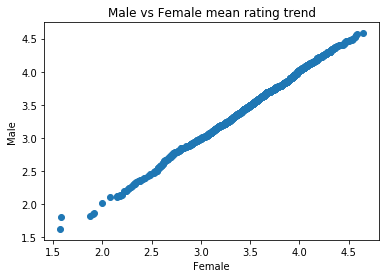

In [64]:
import matplotlib.pyplot as plt

x = top_female_ratings['F']
y = top_male_ratings['M']

plt.title("Male vs Female mean rating trend") #title
plt.xlabel("Female") #x label
plt.ylabel("Male") #y label


plt.scatter(x, y)
plt.show()

In [56]:
top_250_by_counting

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [57]:
top_250_count_from_mean_rating

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738
